In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"D:\Datasets\Csv_excel_txt\diabetcsv.csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [7]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
df.describe(include="all")

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tested_negative
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


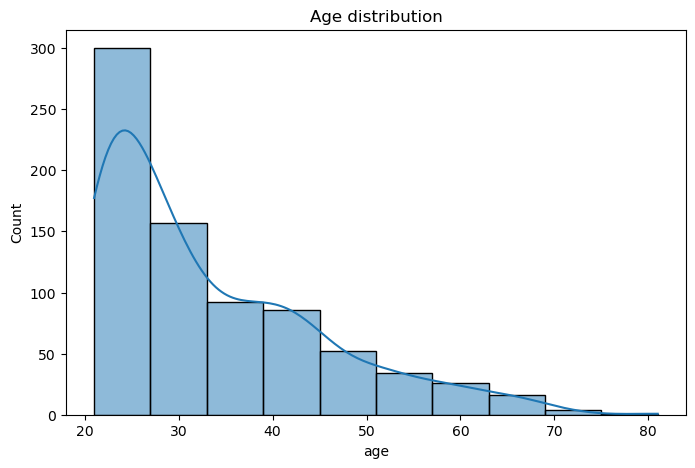

In [17]:
plt.figure(figsize= (8,5))
sns.histplot(df['age'], bins = 10, kde = True)
plt.title('Age distribution')
plt.show()

In [19]:
num_data = df.select_dtypes(include=['number'])
num_data.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


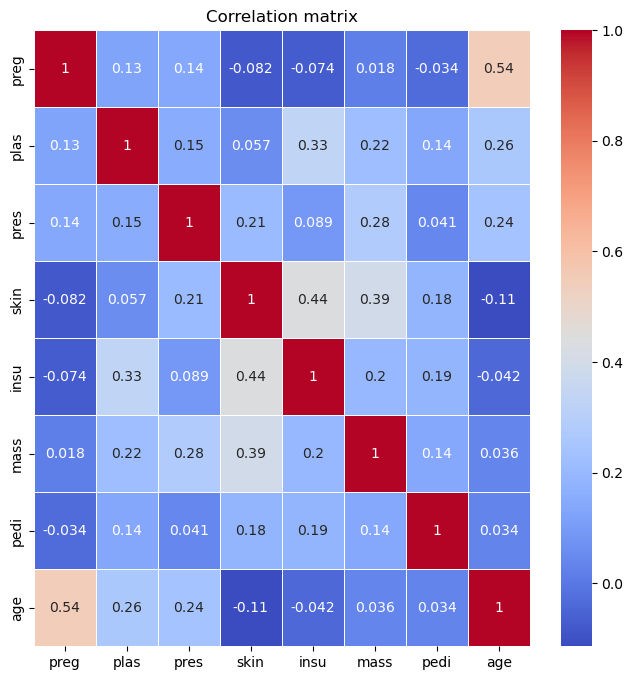

In [29]:
plt.figure(figsize= (8,8))
sns.heatmap(num_data.corr(), cmap= "coolwarm", annot=True,linewidths = 0.5)
plt.title('Correlation matrix')
plt.show()

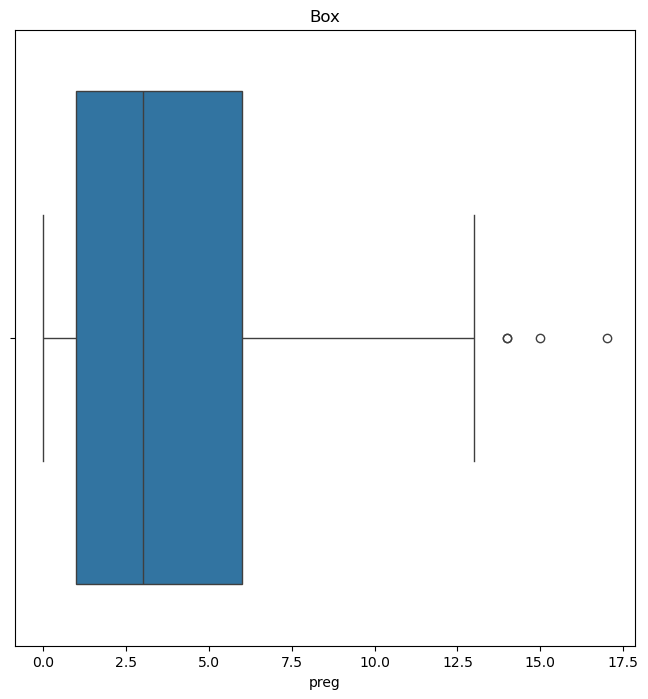

In [33]:
plt.figure(figsize= (8,8))
sns.boxplot(x=df['preg'])
plt.title('Box')
plt.show()

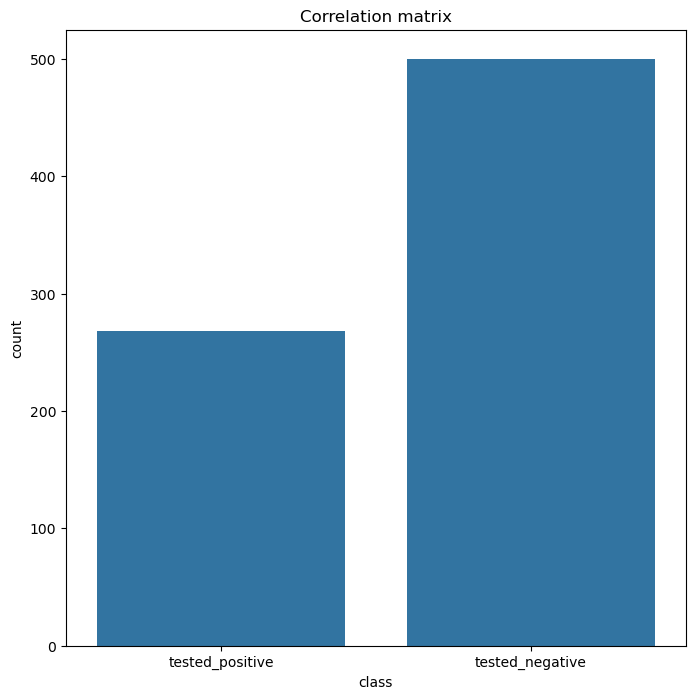

In [35]:
plt.figure(figsize= (8,8))
sns.countplot(x = df ['class'])
plt.title('Count matrix')
plt.show()

<Figure size 800x800 with 0 Axes>

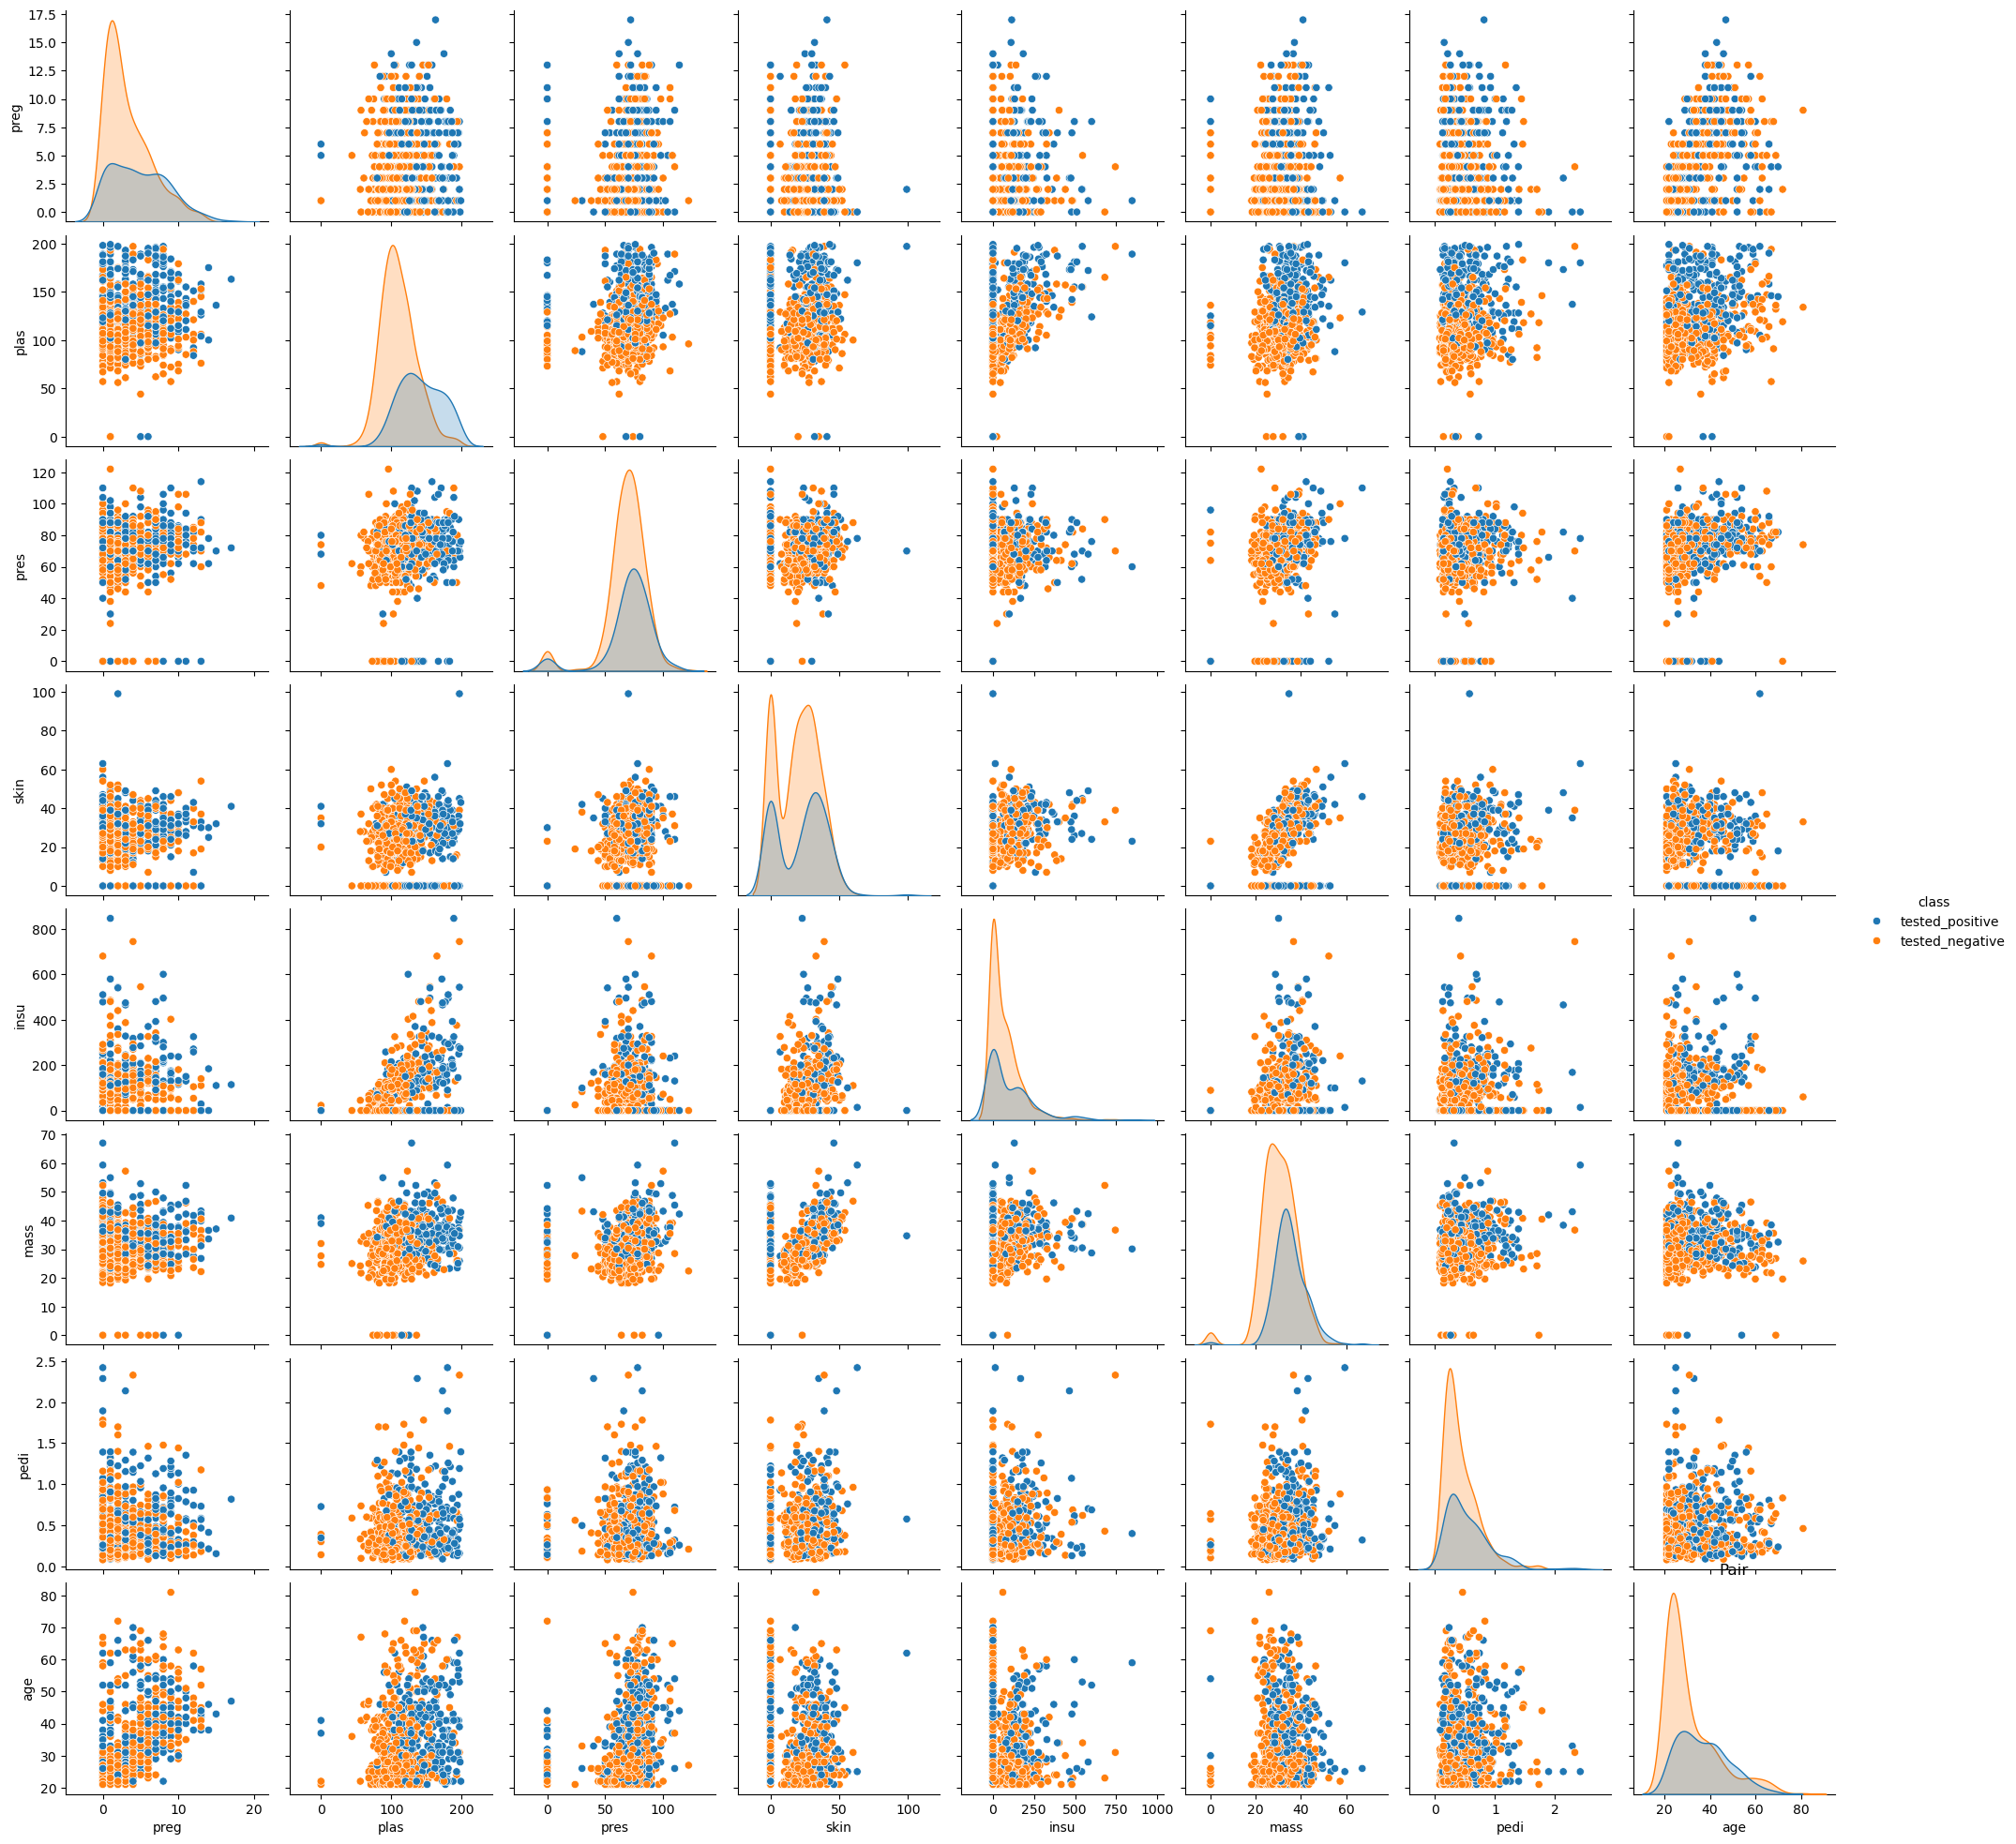

In [39]:
plt.figure(figsize= (8,8))
sns.pairplot(df, hue = 'class')
plt.title('Pair')
plt.show()

In [43]:
Pos = df.groupby('class')['age'].mean()
Pos

class
tested_negative    31.190000
tested_positive    37.067164
Name: age, dtype: float64

In [45]:
Pos1 = df.groupby('class').agg({'age':['count','mean']})
Pos1

age           
                count       mean
class                           
tested_negative   500  31.190000
tested_positive   268  37.067164